<a href="https://colab.research.google.com/github/anamilanezi/ebac-dados/blob/main/exercicios/em15-visualizacao-de-dados-II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

De acordo com a visualização gerada pelo gráfico do tipo boxplot , qualquer diamante custando acima de \$12.500,00, independente do tipo de corte,  pode ser considerado um *outlier*. No entanto, estreitando a análise e fazendo a separação por tipos de corte, vemos que cada corte possui uma faixa que pode ser menor ou maior do que esse valor limite, onde os *outliers* do tipo "Fair" e "Ideal" estão em aproximadamente \$10.000,00, enquanto para os diamantes "Premium", o ponto de corte está entre \$13.750,00 - \$14.000,00

In [2]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


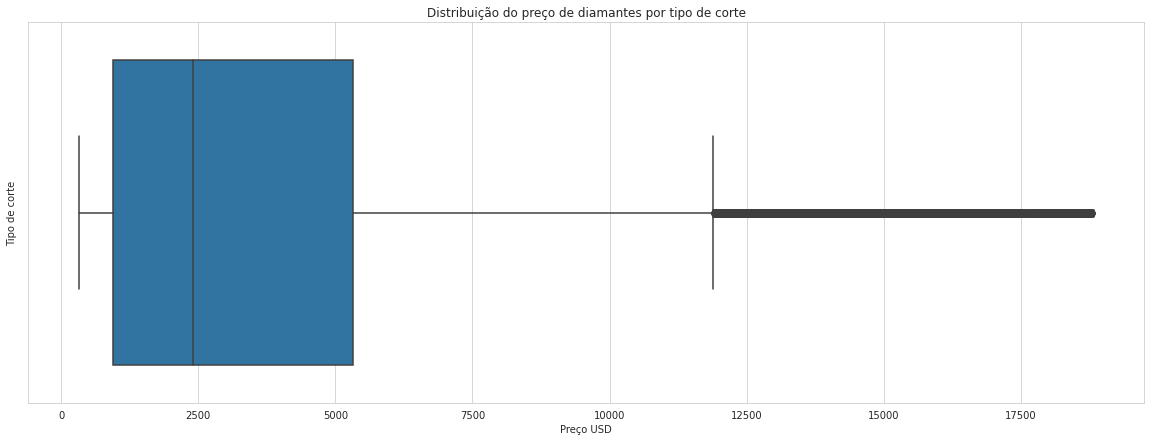

In [31]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["price"])
  grafico.set(title='Distribuição do preço de diamantes por tipo de corte', xlabel='Preço USD', ylabel="Tipo de corte");
  grafico.figure.set_size_inches(w=20, h=7)


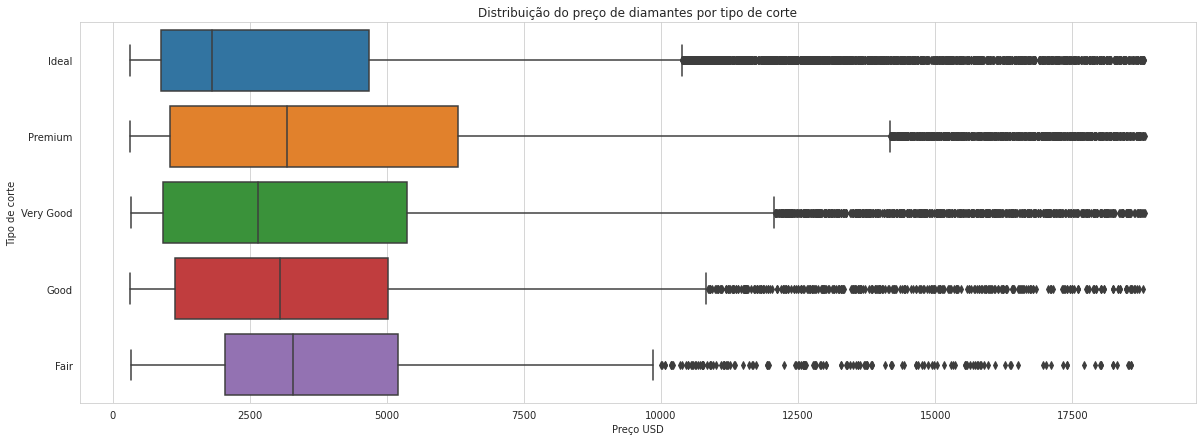

In [30]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=data["price"], y=data['cut'])
  grafico.set(title='Distribuição do preço de diamantes por tipo de corte', xlabel='Preço USD', ylabel="Tipo de corte");
  grafico.figure.set_size_inches(w=20, h=7)


---

In [38]:
# Fórmula para calcular outliers
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers = find_outliers_IQR(data['price'])
print("number of outliers:" + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers:3540
max outlier value: 18823
min outlier value: 11886


## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

A primeira vista parece haver uma correlação positiva entre o peso do diamante e seu preço, onde um aumento no peso ocasiona o aumento do preço, no entanto, muitos diamantes de peso semelhante tambem apresentam uma faixa de preço variável, o que pode ser explicada por outras características, como a própria transparência. Dentre elas, a do tipo "I1" parece apresentar a correlação um pouco mais fraca do que as outras, onde diamantes com os maiores pesos possuem preços proporcionalmente menor do que para as outras transparências.

In [42]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


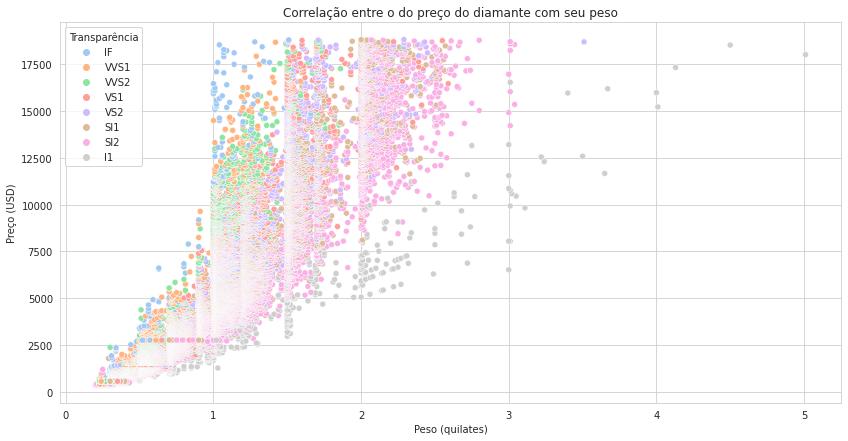

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(data=data, x="carat", y="price", hue="clarity", palette="pastel")
  grafico.set(title='Correlação entre o do preço do diamante com seu peso', xlabel='Peso (quilates)', ylabel='Preço (USD)');
  grafico.get_legend().set_title("Transparência");
  grafico.figure.set_size_inches(w=14, h=7)

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

O histograma produzido com o peso dos carros nos mostra que a curva de distribuição é assimétrica, havendo uma concentração maior de carros com peso entre 2000 e 3000 lbs (de acordo com as informações que encontrei sobre o conjunto de dados mpg, é essa a unidade de medida do peso utilizada), e alguns poucos carros com peso acima de 4500 que deslocam a cauda da curva para a direita.


In [51]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [63]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


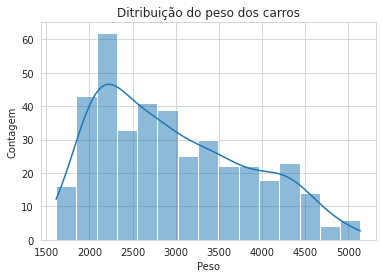

In [70]:
# gráfico do exercício 3

with sns.axes_style('whitegrid'):

  grafico = sns.histplot(data, x=data['weight'], bins=15, kde=True)
  grafico.set(title='Ditribuição do peso dos carros', xlabel='Peso', ylabel='Contagem');


---